## Логистическая регрессия

In [115]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from math import sqrt

In [116]:
boston = load_boston()
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data["MEDV"] = boston.target
data = data.loc[(data['MEDV'] != 50) & (data['RM'] != 8.78) & (data['RM'] > 4)]

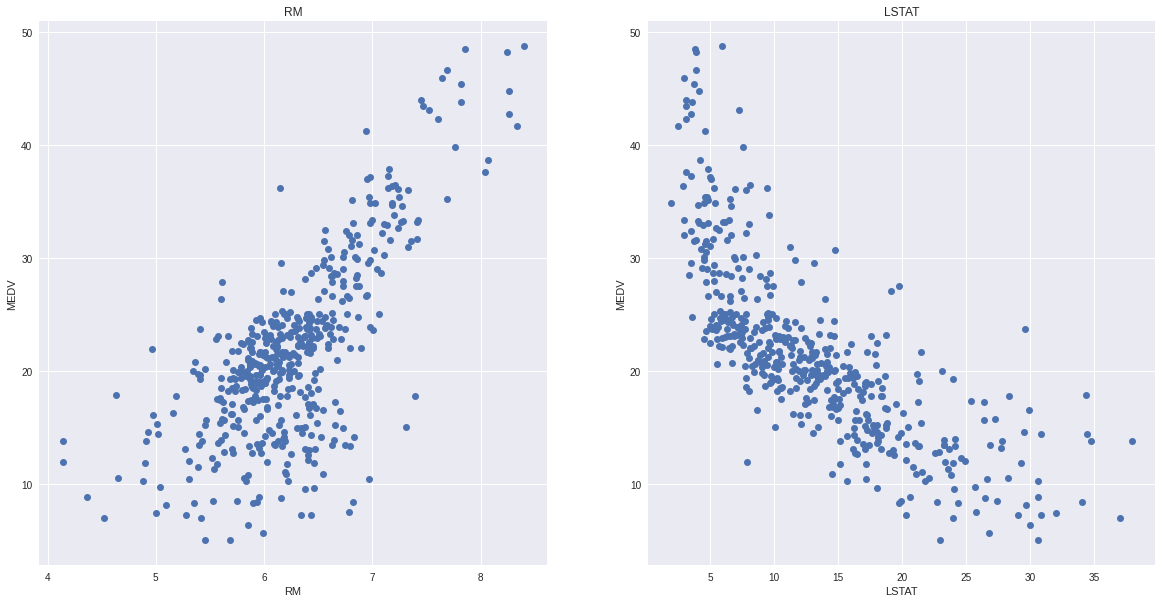

In [117]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(["RM", "LSTAT"]):
    plt.subplot(1, 2, (i+1))
    plt.plot(data[col], data["MEDV"], 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [118]:
def z_scaler(X):
    if len(X.shape) == 1:
        mean = sum(X) / len(X)
        std = sqrt(sum([(x - mean) ** 2 for x in X]) / (len(X) - 1))
        X = [(x - mean) / std for x in X]
        return X
    for col in X.columns:
        mean = sum(X[col]) / len(X[col])
        std = sqrt(sum([(x - mean) ** 2 for x in X[col]]) / (len(X[col]) - 1))
        X[col] = [(x - mean) / std for x in X[col]]
        return X

In [119]:
class LogisticRegression:
    def __init__(self, lr=0.01, n_iter=100000):
        self.lr = lr
        self.n_iter = n_iter
     
    def fit(self, X, y):
        intercept = np.ones((X.shape[0], 1))
        X = np.concatenate((intercept, X), axis=1)
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.n_iter):
            z = np.dot(X, self.theta)
            h =  1 / (1 + np.exp(-z))
            gradient = np.dot(X.T, (h - y)) / len(y)
            self.theta -= self.lr * gradient
            
    def predict(self, X):
        intercept = np.ones((X.shape[0], 1))
        X = np.concatenate((intercept, X), axis=1)
        return 1 / (1 + np.exp(-(np.dot(X, self.theta))))

In [120]:
X_filtered = data[["RM", "LSTAT"]]
y_filtered = data["MEDV"]
X_scaled = z_scaler(X_filtered)
y_scaled = z_scaler(y_filtered)

In [125]:
X_train, X_test, Y_train, Y_test =\
    train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=18)
model = LogisticRegression(lr=0.01, n_iter=300)
%time model.fit(X_train, Y_train)

CPU times: user 12.3 ms, sys: 2 µs, total: 12.3 ms
Wall time: 12.3 ms


In [126]:
model.theta

array([ -0.24722253,   1.77061614, -17.01959003])

In [127]:
preds = model.predict(X_train)
preds

array([7.95827128e-178, 2.11988561e-117, 1.23411055e-070, 3.94198393e-126,
       1.27472142e-172, 9.22228995e-085, 2.28783140e-114, 1.39755724e-128,
       4.64347693e-061, 3.22772503e-132, 6.58624833e-034, 5.24357107e-058,
       1.20178419e-071, 1.14676679e-069, 4.89888422e-100, 1.47708759e-049,
       5.72264847e-036, 6.99398461e-106, 2.65050846e-060, 4.86556932e-179,
       4.68698028e-026, 2.21306621e-093, 1.25374560e-041, 1.07814936e-053,
       1.01730988e-105, 1.47819261e-056, 1.37383479e-109, 1.10030591e-141,
       4.18206584e-127, 2.57081446e-117, 9.66220511e-099, 5.62439370e-071,
       2.55061954e-043, 1.01359931e-133, 7.22844159e-046, 3.64905621e-061,
       5.30376030e-077, 3.01489338e-047, 1.12377514e-085, 2.28170644e-172,
       1.84292645e-196, 2.07326304e-097, 5.08212516e-039, 2.98582357e-110,
       1.43165385e-072, 1.42755317e-049, 6.35864714e-228, 2.04066580e-061,
       3.65020154e-173, 3.88039928e-055, 4.97323468e-107, 6.46889834e-151,
       2.63189009e-135, 3